# Proyecto Final - Data Science II: Machine Learning para la Ciencia de Datos
- **Alumno**: Matias Schinner
- **Comisión**: 61695

## Desarrollo del proyecto:
Este proyecto tiene como objetivo analizar y predecir la resistencia a la compresión del concreto en función de su composición de fabricación y la edad del mismo. Para ello, se emplearán técnicas de análisis de datos, visualización y algoritmos de regresión de machine learning.

El análisis se centrará en:
- Explorar la variabilidad entre los diferentes componentes del concreto y su influencia en la resistencia a la compresión.
- Identificar qué materiales y proporciones tienen mayor impacto en la resistencia final.
- Desarrollar modelos de machine learning para predecir la resistencia del concreto en función de su composición y edad.

Este proyecto servirá como práctica en la aplicación de modelos de regresión, utilizando bibliotecas como `pandas`, `numpy`, `scikit-learn`, `matplotlib` y `seaborn`. Al final, se espera obtener un modelo capaz de estimar con precisión la resistencia a la compresión del concreto a partir de sus ingredientes, además de extraer insights sobre cuáles factores son más determinantes en su desempeño estructural.

----------

## Dataset elegido:
El conjunto de datos proviene de un archivo que contiene información sobre diferentes mezclas de concreto y su resistencia a la compresión medida en megapascales (MPa). Cada fila representa una muestra de concreto con valores específicos de sus componentes/ingredientes y el número de días de estadio antes de la medición de la resistencia.

### Columnas del dataset:
*Vale aclarar que los ingredientes del concreto estan medidos en Kg del ingrediente por metro cubico de concreto final*
- **Cement [kg/m³]**: Cantidad de cemento en la mezcla, principal aglutinante.
- **Blast Furnace Slag [kg/m³]**: Escoria de alto horno, un material cementante suplementario que puede mejorar la durabilidad.
- **Fly Ash [kg/m³]**: Ceniza volátiles, otro material complementario que puede reducir costos y mejorar ciertas propiedades.
- **Water [kg/m³]**: Cantidad de agua utilizada; su relación con el cemento es crucial para la resistencia.
- **Superplasticizer [kg/m³]**: Aditivos Superplastificantes que mejoran la trabajabilidad y permiten reducir la cantidad de agua sin perder fluidez.
- **Coarse Aggregate [kg/m³]**: Agregado grueso (grava), que aporta estabilidad y resistencia mecánica.
- **Fine Aggregate [kg/m³]**: Agregado fino (arena), que rellena los espacios y mejora la cohesión de la mezcla.
- **Age [day]**: Número de días transcurridos desde la fabricación de la muestra hasta la medición de la resistencia.
- **Concrete compressive strength [MPa]**: Representa la resistencia a la compresión del concreto en megapascales.

[Fuente: Dataset - Concrete Compressive Strength](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)

----------
## Hipótesis planteadas:
1. Un mayor contenido de cemento estará asociado con una mayor resistencia del concreto.
2. Una mayor cantidad de agua reducirá la resistencia a la compresión debido a una mayor porosidad.
3. La edad del concreto seguirá una relación no lineal con la resistencia, mostrando mayor crecimiento en los primeros días y estabilizándose después de 28 días.
4. El uso de superplastificantes permitirá aumentar la resistencia al reducir la relación agua/cemento.

----------
### Se importan las librerías con las que se trabajarán a lo largo del proyecto:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

----------
### Lectura del dataset
Se carga el dataset a partir de un archivo "*.csv*"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Coderhouse/Carrera Data Science/DS II/Proyecto DS II/Concrete strength prediction.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Control de carga de datos correcta:

In [ ]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#Se renombran las columnas con el objetivo de tener una mejor identificación de cada una
df.columns = [
    "Cement [Kg/m³]",
    "Blast Furnace Slag [Kg/m³]",
    "Fly Ash [Kg/m³]",
    "Water [Kg/m³]",
    "Superplasticizer [Kg/m³]",
    "Coarse Aggregate [Kg/m³]",
    "Fine Aggregate [Kg/m³]",
    "Age [days]",
    "Concrete Compressive Strength [MPa]"
]

df.head()

,Cement [Kg/m³],Blast Furnace Slag [Kg/m³],Fly Ash [Kg/m³],Water [Kg/m³],Superplasticizer [Kg/m³],Coarse Aggregate [Kg/m³],Fine Aggregate [Kg/m³],Age [days],Concrete Compressive Strength [MPa]
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#Chequeo de los ultimos 5 datos:
df.tail()

,Cement [Kg/m³],Blast Furnace Slag [Kg/m³],Fly Ash [Kg/m³],Water [Kg/m³],Superplasticizer [Kg/m³],Coarse Aggregate [Kg/m³],Fine Aggregate [Kg/m³],Age [days],Concrete Compressive Strength [MPa]
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


------------------------------
## Análisis exploratorio de datos:
Este análisis sirve para comprender la estructura y las características fundamentales de un conjunto de datos a partir de un conjunto de técnicas que se basan en métodos estadísticos y visuales. Estas técnicas incluyen el uso de medidas descriptivas como la media, mediana y desviación estándar, así como la creación de gráficos y diagramas para visualizar patrones y relaciones. Además, el análisis exploratorio permite detectar anomalías y valores atípicos.

----------
### Chequeo del tipo de datos:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Cement [Kg/m³]                       1030 non-null   float64
 1   Blast Furnace Slag [Kg/m³]           1030 non-null   float64
 2   Fly Ash [Kg/m³]                      1030 non-null   float64
 3   Water [Kg/m³]                        1030 non-null   float64
 4   Superplasticizer [Kg/m³]             1030 non-null   float64
 5   Coarse Aggregate [Kg/m³]             1030 non-null   float64
 6   Fine Aggregate [Kg/m³]               1030 non-null   float64
 7   Age [days]                           1030 non-null   int64  
 8   Concrete Compressive Strength [MPa]  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


-------------
Este resumen nos brinda información sobre:
- **El tipo de datos**: Tenemos **valores numéricos flotantes** para casi todas las columnas excepto por la columna `Age` que tiene **valores numéricos enteros**
- **Cantidad de columnas y registros**: Podemos ver que posee 9 columnas numeradas del 0 al 8 y una cantidad de índices (registros) de 1030 numerados del 0 al 1029.
- **Conteo de valores no nulos**: El conteo de valores no nulos para todas las columnas es de 1030, es decir, que todos los registros en el dataset contienen valores.
- --------------------------------------------------------------

### Cantidad de registros:

In [ ]:
#Este codigo nos devuelve una tupla que contiene: (Cantidad de filas/registros/indices, cantidad de columnas)
df.shape

(1030, 9)

(Filas, Columnas)

--------------
### Control de datos faltantes:

In [ ]:
df.isnull().sum()

,0
Cement [Kg/m³],0
Blast Furnace Slag [Kg/m³],0
Fly Ash [Kg/m³],0
Water [Kg/m³],0
Superplasticizer [Kg/m³],0
Coarse Aggregate [Kg/m³],0
Fine Aggregate [Kg/m³],0
Age [days],0
Concrete Compressive Strength [MPa],0


-----------------------------------
Esta tabla nos muestra la cantidad de datos faltantes y valores vacíos, indicando que todas las columnas contienen 0 registros nulos o incompletos. Esto significa que **no** es necesario realizar tareas de reemplazo o eliminación de datos faltantes en este caso.

Sin embargo, a modo informativo, se detallan las posibles estrategias que podrían aplicarse en caso de que existieran valores nulos:

- _**Eliminar filas o columnas**_: Se pueden eliminar los registros o las columnas que contengan valores nulos, siempre y cuando no afecte negativamente al análisis. `dataframe.dropna(axis=0, inplace=True)` (axis= 1 para columnas, axis= 0 para registros)
- _**Rellenar con valores específicos**_: Reemplazar los valores faltantes por un número fijo, como un 0, o por un promedio, mediana u otro valor estadístico relevante. `dataframe.fillna(promedio, inplace=True)`
- _**Interpolación o métodos avanzados**_: Usar técnicas de interpolación entre los valores proximos a los faltantes. `dataframe.interpolate(limit_direction="both",inplace=True)`
------------------------------------

### Estadística descriptivas:

In [ ]:
df.describe()

,Cement [Kg/m³],Blast Furnace Slag [Kg/m³],Fly Ash [Kg/m³],Water [Kg/m³],Superplasticizer [Kg/m³],Coarse Aggregate [Kg/m³],Fine Aggregate [Kg/m³],Age [days],Concrete Compressive Strength [MPa]
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


En esta tabla se puede ver: la cantidad, la media, desviación estándar, el mínimo y máximo, cuartiles del 25%, 50% y 75% de cada columna.
Esto nos otorga una visión sobre los valores, el rango de los mismos, dispersión y media de los datos que estamos trabajando.

-----

### <u>Análisis Univariado</u>:
Este análisis nos ayudará a entender la distribución de cada variable y detectar valores extremos.

### Control de distribución de datos y detección de outliers:

*   **Boxplots:**

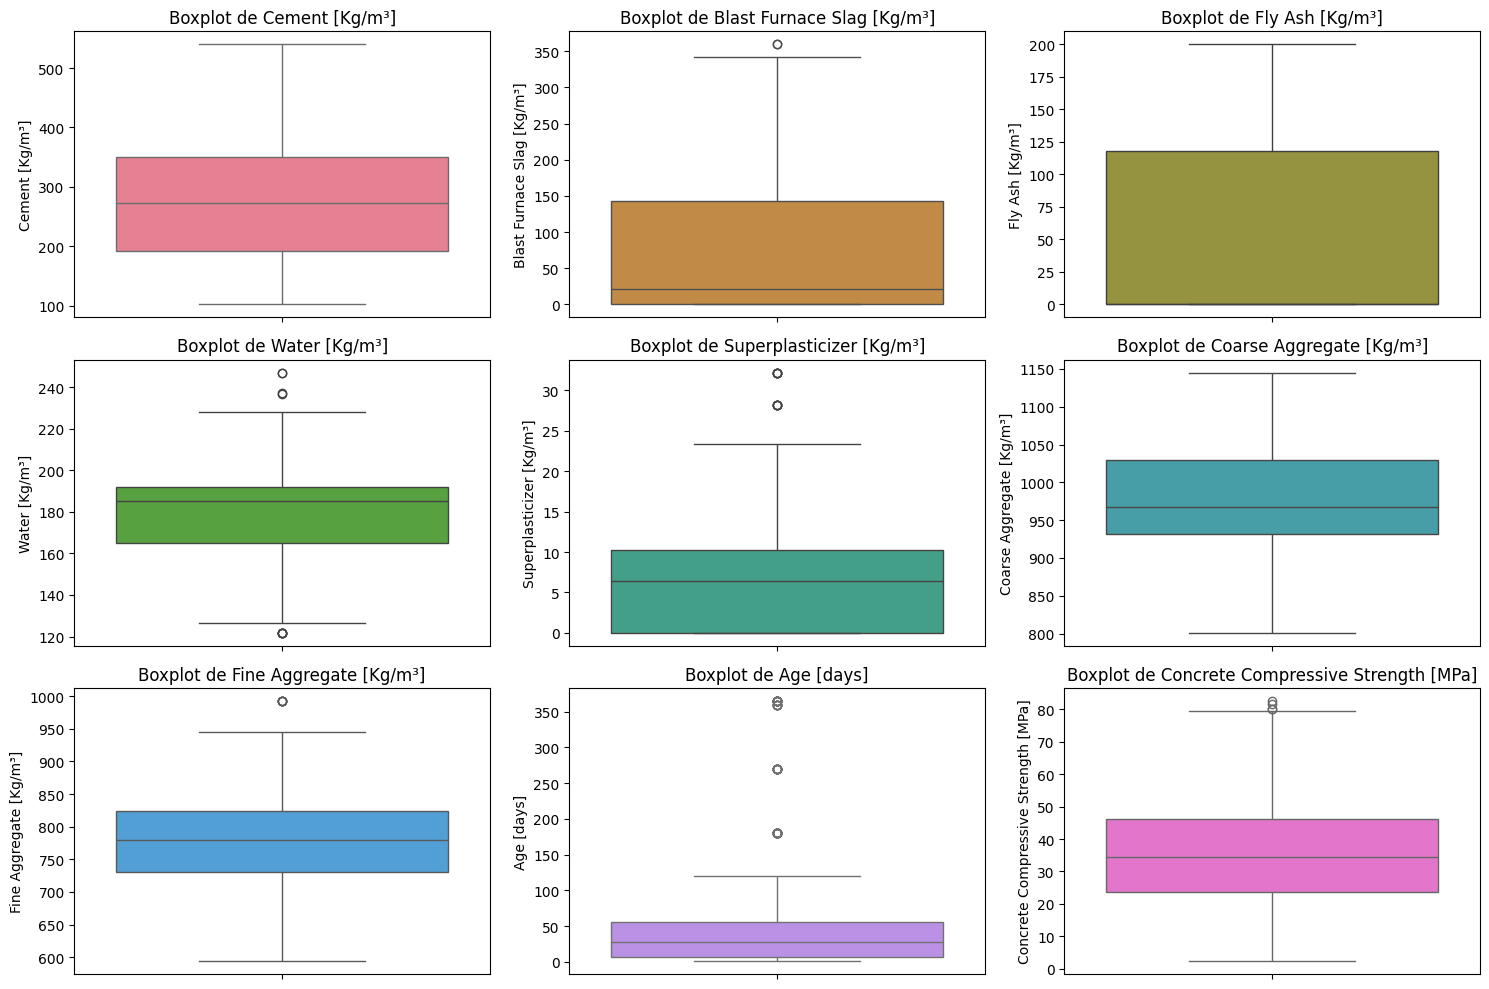

In [ ]:
colors = sns.color_palette("husl", n_colors=9)

variables = [
    "Cement [Kg/m³]", "Blast Furnace Slag [Kg/m³]", "Fly Ash [Kg/m³]",
    "Water [Kg/m³]", "Superplasticizer [Kg/m³]", "Coarse Aggregate [Kg/m³]",
    "Fine Aggregate [Kg/m³]", "Age [days]", "Concrete Compressive Strength [MPa]"
]

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df[var], color=colors[i])
    plt.title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()

Podemos ver que se encuentren ciertos puntos fuera del boxplot en las variables Blast Furnace Slag, Water, Superplasticizer, Fine Aggregate, Age y Concrete compressive Strength. Sin embargo, se optará por conservar estos valores debido a las siguientes razones:
- Si bien son datos fuera de lo que se considera +-1,5 * Rango intercuartilico, no son considerados atípicos para el valor que representan.
- La cantidad de datos (1030) es baja y está fuertemente relacionada con la certeza del modelo predictivo, por lo que se opta por no eliminar valores.

*   **Histograma:**

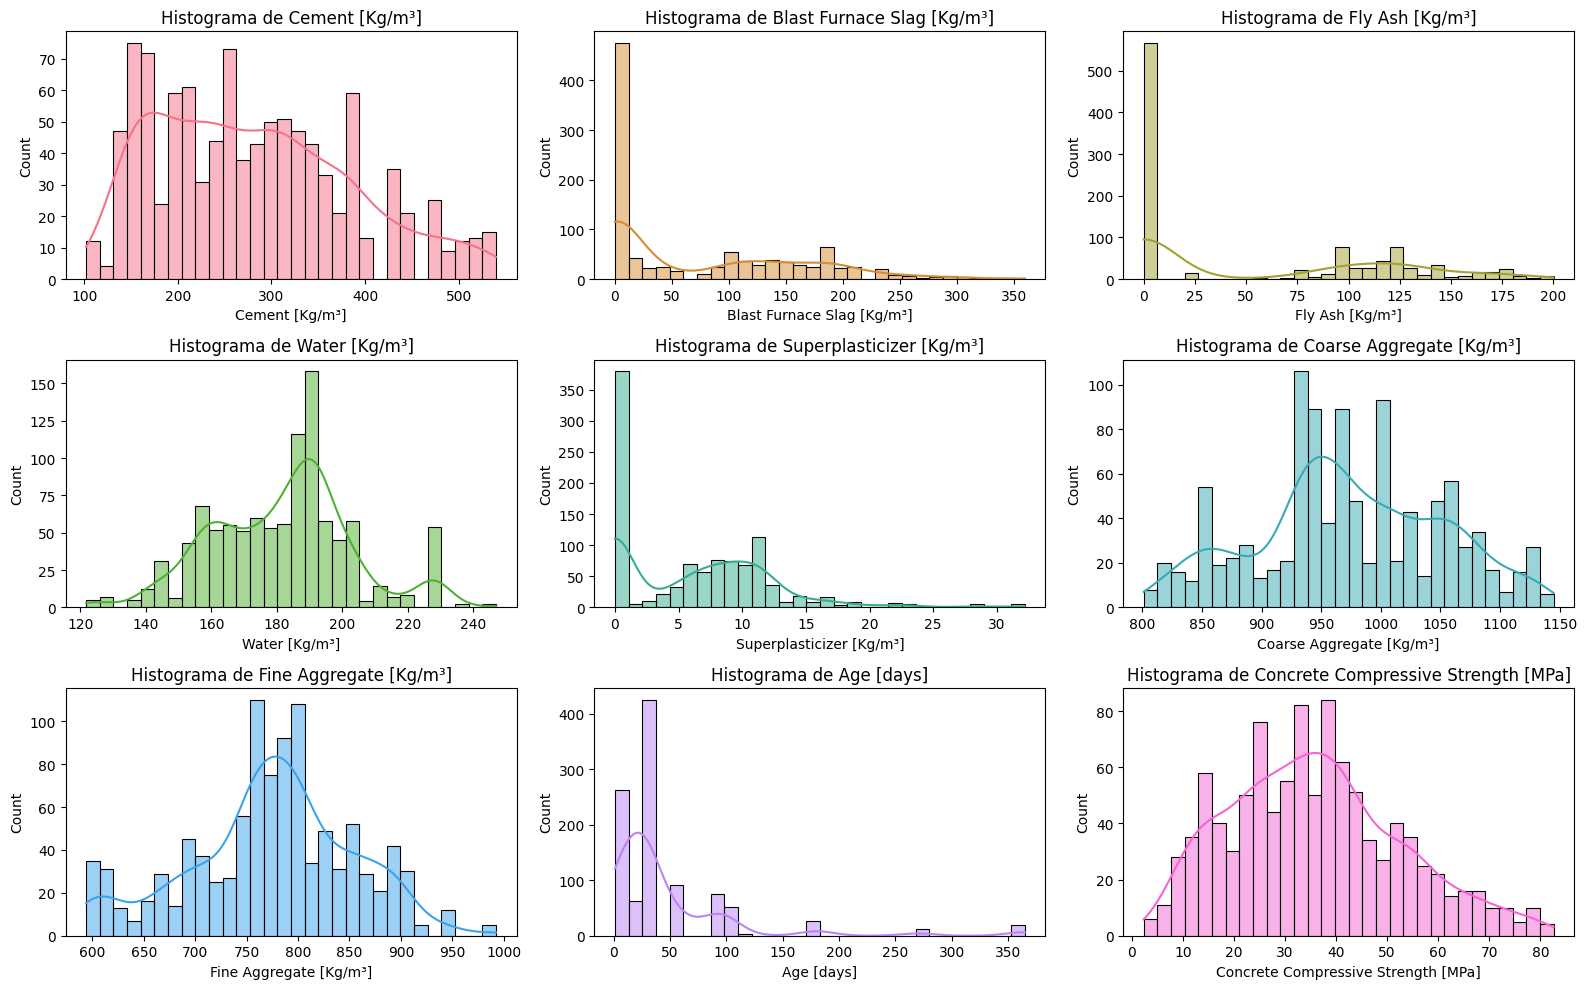

In [ ]:
colors = sns.color_palette("husl", n_colors=9)
variables = [
    "Cement [Kg/m³]", "Blast Furnace Slag [Kg/m³]", "Fly Ash [Kg/m³]",
    "Water [Kg/m³]", "Superplasticizer [Kg/m³]", "Coarse Aggregate [Kg/m³]",
    "Fine Aggregate [Kg/m³]", "Age [days]", "Concrete Compressive Strength [MPa]"
]

plt.figure(figsize=(16, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[var], kde=True, bins=30, color=colors[i])
    plt.title(f"Histograma de {var}")

plt.tight_layout()
plt.show()

En estos gráficos de histogramas para cada variable podemos apreciar la distribución que poseen cada uno.
Se puede ver que Cement, Water, Coarse Aggregate, Fine Aggregate y Concrete Compressive Strength tienen una marcada distribución normal.
Mientras que Blast Furnace Slag, Fly Ash, Superplasticizer y Age.

-----------------------------------------
### <u>Análisis Bivariado</u>:
Aquí buscamos relaciones entre las variables de entrada y la resistencia del concreto.

### Correlaciones:

*   **Scatterplot:**

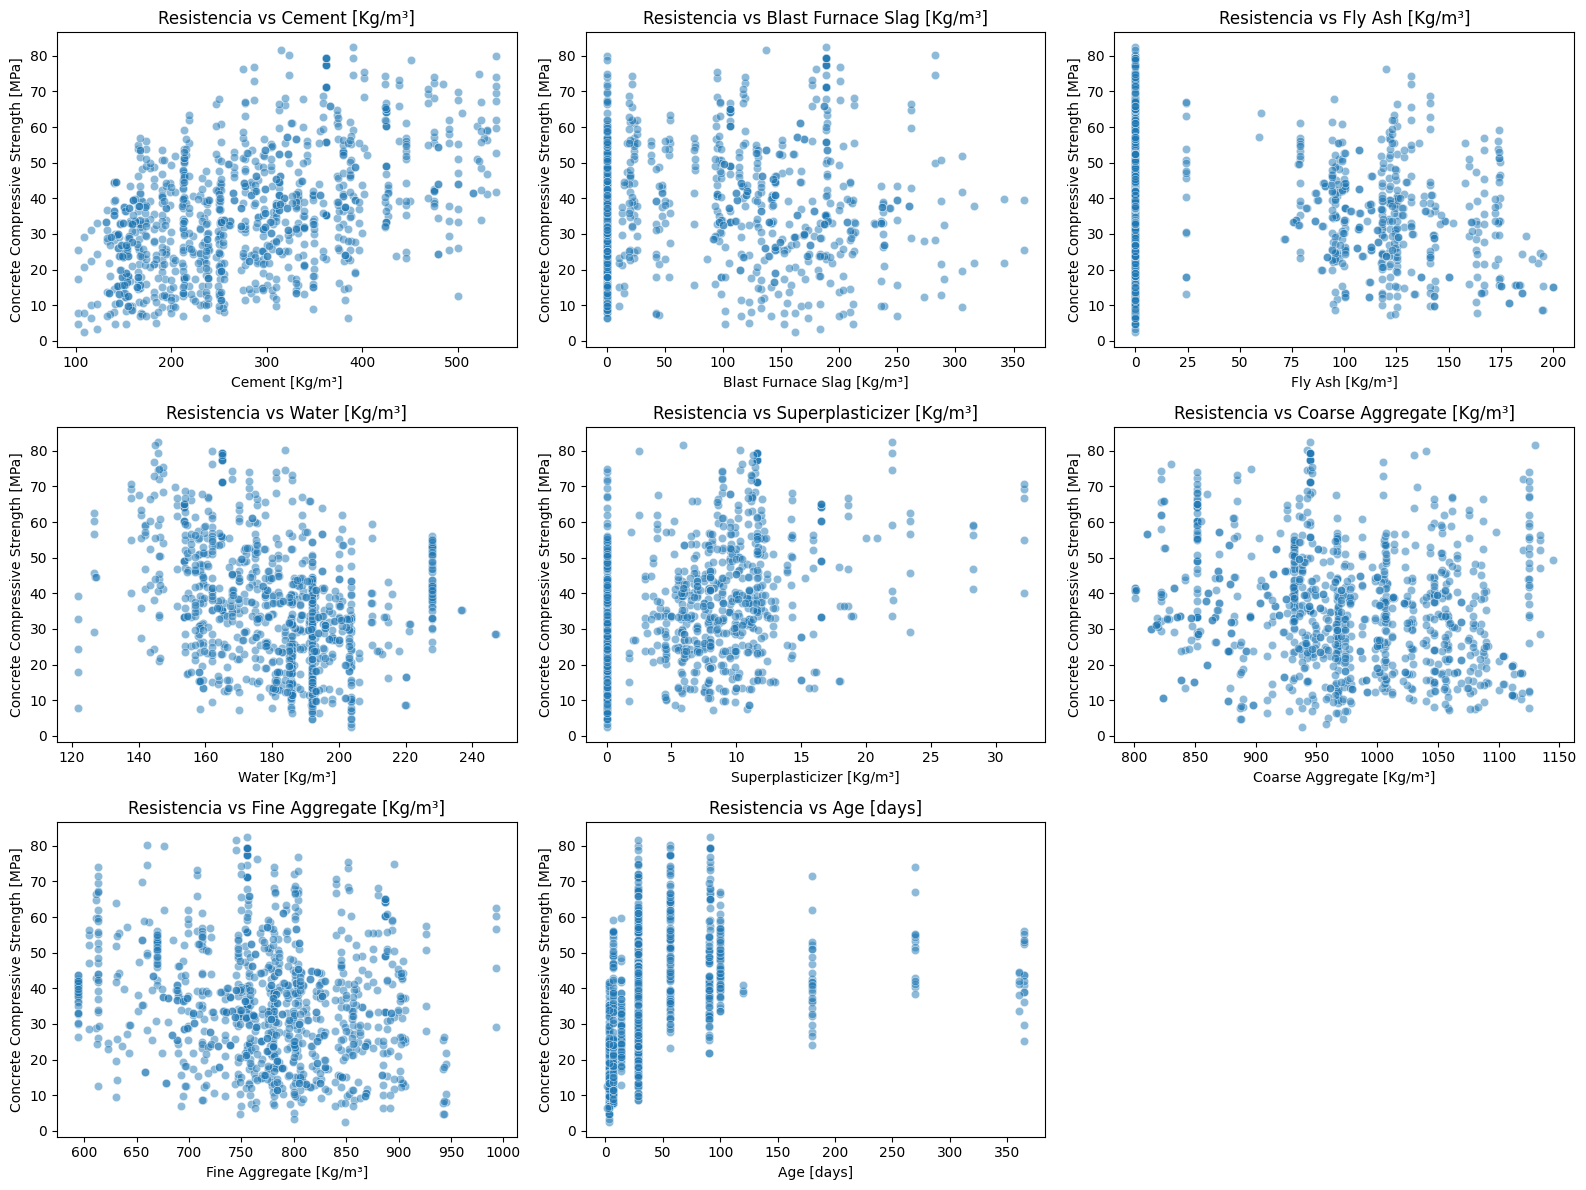

In [ ]:
plt.figure(figsize=(16, 12))
for i, var in enumerate(variables[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[var], y=df["Concrete Compressive Strength [MPa]"], alpha=0.5)
    plt.title(f"Resistencia vs {var}")

plt.tight_layout()
plt.show()

-----------------------------------------
### <u>Análisis Multivariado</u>:
Aquí exploramos relaciones entre todas las variables simultáneamente.

*   **Heatmap:**

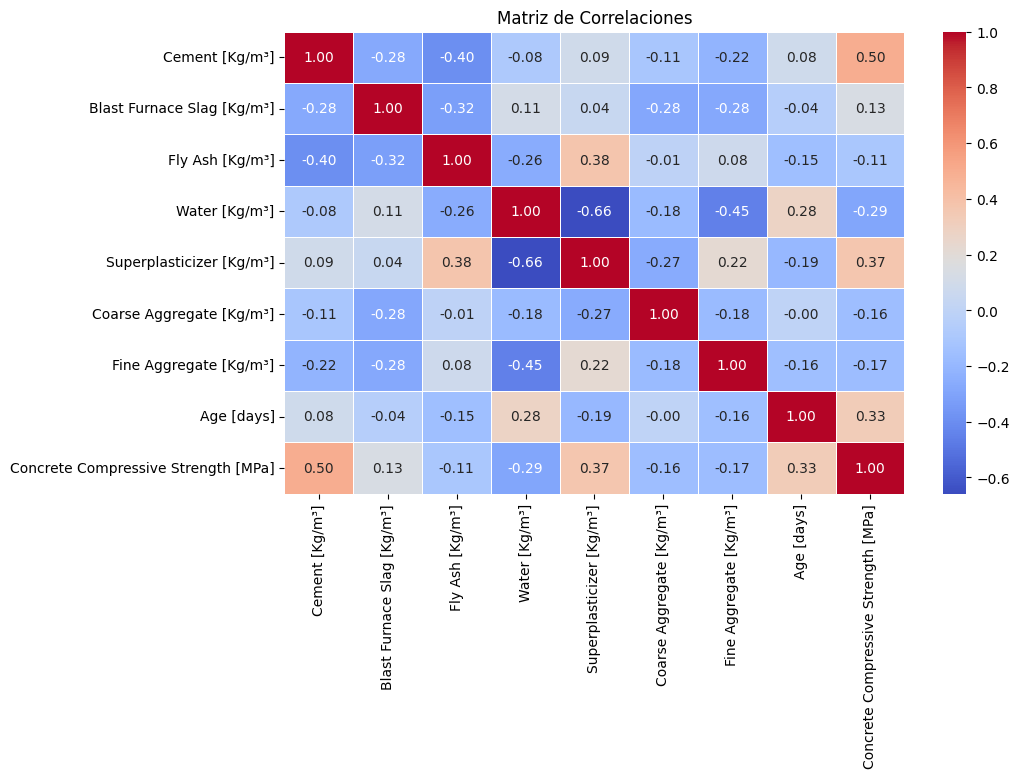

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()

**Interpretación del Coeficiente de Correlación**
- 0 a 0.2: Sin correlación o correlación muy débil.
- 0.2 a 0.3: Correlación débil.
- 0.3 a 0.5: Correlación moderada.
- 0.5 a 0.7: Correlación fuerte.
- 0.7 a 1.0: Correlación muy fuerte.

**Interpretación del signo de la correlación:**
- <u>Correlación negativa</u>: Un valor negativo indica que a medida que una variable aumenta, la otra tiende a disminuir.
- <u>Correlación positiva</u>: Un valor positivo indica que ambas variables tienden a aumentar o disminuir juntas.


**Aquellos que tienen una correlación con la resistencia del concreto son:**

| Variables     | Correlación     | Tipo de correlación     |
|---------------|---------------|---------------|
| Cemento| 0.5 | Correlación positiva moderada/fuerte |
| Agua | -0.29| Correlación negativa débil/moderada|
| Superplastificante | 0.37 |Correlación positiva moderada|
| Age | 0.33|Correlación positiva débil/moderada|

*   **Pairplot:**

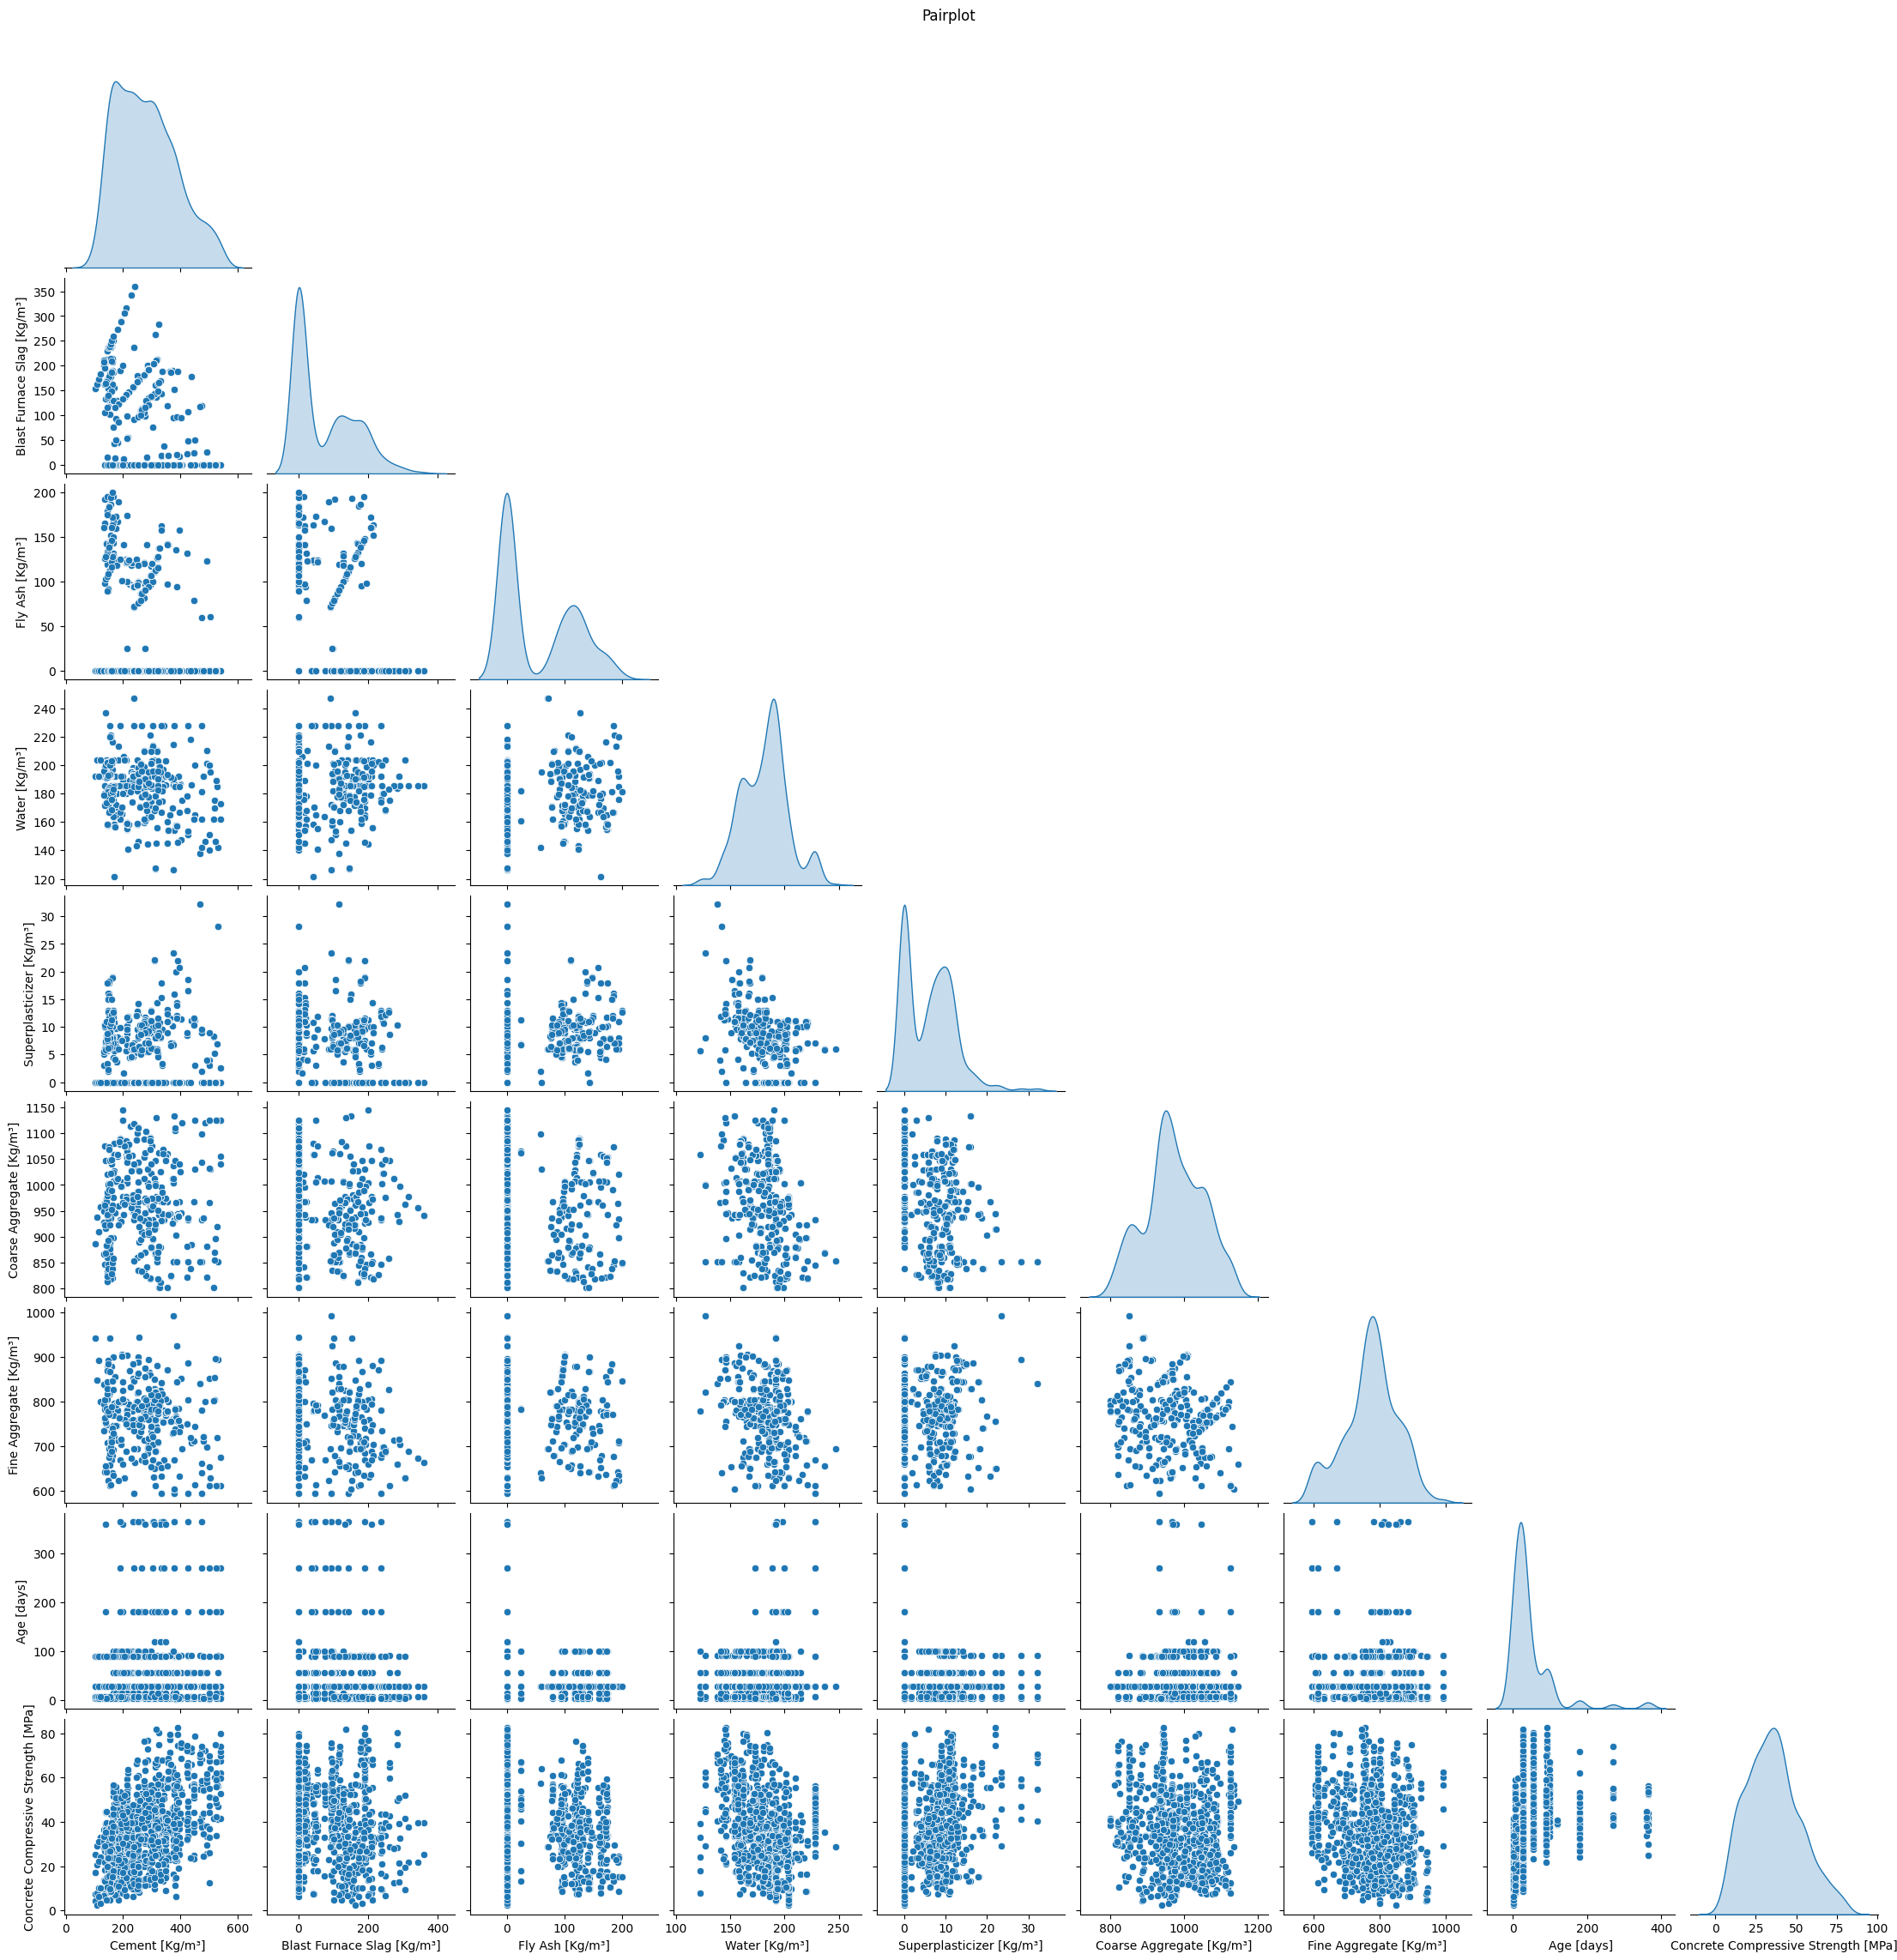

In [ ]:
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Pairplot", y=1.02)
plt.show()

---------------------
##<u>Conclusión Hipótesis según EDA realizado</u>:

1. "*Un mayor contenido de cemento estará asociado con una mayor resistencia del concreto.*"  
  ***A partir de las correlaciones obtenidas se puede ver que mayor contenido de cemento conlleva a una mayor resistencia del concreto.***

2. "*Una mayor cantidad de agua reducirá la resistencia a la compresión debido a una mayor porosidad.*"   
  ***No necesariamente. Por los resultados del análisis se puede ver que tiene una distribución normal respecto a la variación de la resistencia con la composición de agua. Esto quiere decir que la mayor resistencia lograda está acotada en un rango de contenido de agua.***

3. "La edad del concreto seguirá una relación no lineal con la resistencia, mostrando mayor crecimiento en los primeros días y estabilizándose después de 28 días."   
  ***Verdadero. Se puede ver en el grafico de Scatterplot de la Resistencia vs Age que al comienzo de los días hay una tendencia a aumentar la resistencia a medida que pasan los días, a partir de aproximadamente de los 28 días comienza a estabilizarse la resistencia en un valor constante***

4. "El uso de superplastificantes permitirá aumentar la resistencia al reducir la relación agua/cemento."   
  ***Verdadero. Mirando la matriz de correlación tenemos estos dos casos:***

  **- El agua es inversamente proporcional a la resistencia del concreto.**   
  **- El superplastificante es directamente proporcional a la resistencia del concreto.**

  ***Por lo que al reemplazar el agua por el superplastificante la resistencia del concreto aumenta debido a sacar agua (Que disminuye la resistencia) y aumenta el contenido de superplastificante (Que aumenta la resistencia).***

------------

## Ingeniería de atributos / Feature engineering
Es el proceso de *crear o transformar variables* para que los modelos de Machine Learning descubran patrones ocultos en los datos.
En esta sección se crearan nuevas variables, se escalaran los datos y se utilizará PCA para reducir la dimensionalidad.

### Encoding:
En esta ocación no se realiza encoding debido a que no tenemos variables categorias para transformarlas a numericas

### Creación de nuevas variables:
El objetivo es generar nuevas variables que puedan capturar mejor las relaciones entre los ingredientes del concreto y su resistencia.

In [ ]:
# Relaciones entre componentes clave
df['Water_Cement_Ratio'] = df['Water [Kg/m³]'] / (df['Cement [Kg/m³]'] + 1e-6)
df['Aggregate_Ratio'] = df['Coarse Aggregate [Kg/m³]'] / (df['Fine Aggregate [Kg/m³]'] + 1e-6)
df['Binder_Content'] = df['Cement [Kg/m³]'] + df['Blast Furnace Slag [Kg/m³]'] + df['Fly Ash [Kg/m³]']
df['Water_Binder_Ratio'] = df['Water [Kg/m³]'] / (df['Binder_Content'] + 1e-6)
df['Total_Components'] = df['Cement [Kg/m³]'] + df['Blast Furnace Slag [Kg/m³]'] + df['Fly Ash [Kg/m³]'] + df['Water [Kg/m³]'] + df['Superplasticizer [Kg/m³]'] + df['Coarse Aggregate [Kg/m³]'] + df['Fine Aggregate [Kg/m³]']
# El valor "1e-6" se agrega con el objetivo de que si un componentes de los que se usa es cero no haya error de Divisor = 0



*   Water_Cement_Ratio (Relación Agua/Cemento): La relación agua/cemento (w/c) determina fundamentalmente la resistencia y durabilidad del concreto.
  *   Valores bajos (típicamente 0.35-0.45): Alta resistencia pero menor trabajabilidad
  *   Valores altos (>0.5): Menor resistencia pero más fácil colocación
*   Aggregate_Ratio (Relación Agregado Grueso/Fino): Esta relación afecta la granulometría de la mezcla.
  *   Controla la trabajabilidad y densidad de la mezcla
  *   Afecta la porosidad y resistencia final

*  Binder_Content (Contenido de Material Cementicio): Agrupa todos los materiales con propiedades cementicias. El cemento es el principal, pero la escoria de alto horno (Blas furnace Slag) y ceniza volante (Fly Ash) contribuyen a la resistencia.
  *   Mayor contenido generalmente aumenta resistencia
  *   Materiales suplementarios mejoran durabilidad

* Water_Binder_Ratio (Relación Agua/Material Cementicio): Extensión de la relación w/c que considera todos los materiales cementicios.
  *   Proporciona una medida más precisa de la relación agua/material reactivo
  *   Útil para mezclas con altos volúmenes de materiales suplementarios

*  Total_Components (Suma Total de Componentes): Representa la densidad total de la mezcla.
  *   Detecta posibles errores en los datos
  *   Puede indicar mezclas ligeras o pesadas
  





In [ ]:
#Resumen con las nuevas variables
df[['Water_Cement_Ratio', 'Aggregate_Ratio', 'Binder_Content', 'Water_Binder_Ratio','Total_Components']].head()

,Water_Cement_Ratio,Aggregate_Ratio,Binder_Content,Water_Binder_Ratio,Total_Components
0,0.300000,1.538462,540.0,0.30000,2420.5
1,0.300000,1.560651,540.0,0.30000,2435.5
2,0.685714,1.569024,475.0,0.48000,2229.0
3,0.685714,1.569024,475.0,0.48000,2229.0
4,0.966767,1.185221,331.0,0.58006,2326.9


In [ ]:
correlation = df.corr()["Concrete Compressive Strength [MPa]"].sort_values(ascending=False)
print(correlation)

Concrete Compressive Strength [MPa]    1.000000
Binder_Content                         0.613184
Cement [Kg/m³]                         0.497832
Total_Components                       0.407870
Superplasticizer [Kg/m³]               0.366079
Age [days]                             0.328873
Blast Furnace Slag [Kg/m³]             0.134829
Aggregate_Ratio                        0.049028
Fly Ash [Kg/m³]                       -0.105755
Coarse Aggregate [Kg/m³]              -0.164935
Fine Aggregate [Kg/m³]                -0.167241
Water [Kg/m³]                         -0.289633
Water_Cement_Ratio                    -0.500692
Water_Binder_Ratio                    -0.623087
Name: Concrete Compressive Strength [MPa], dtype: float64


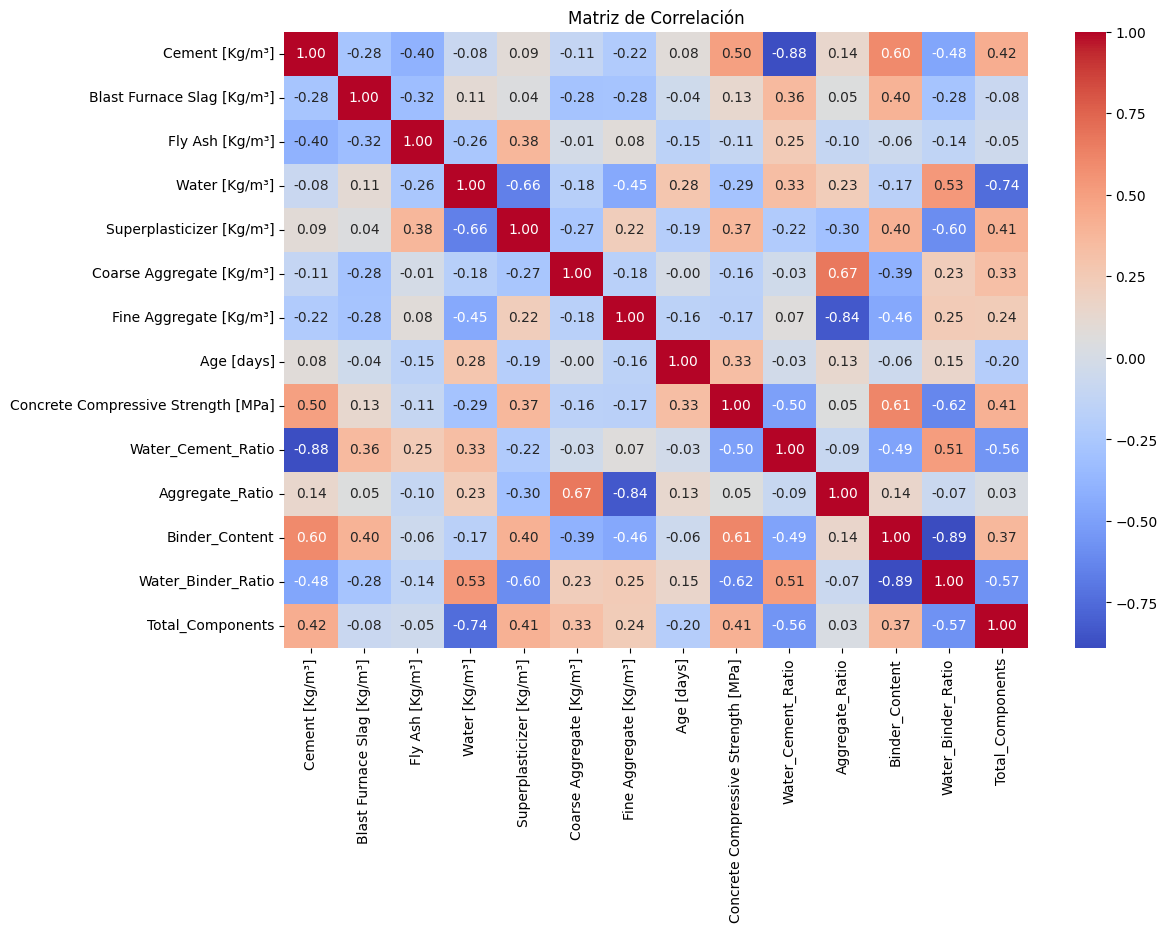

In [ ]:
# Nueva matriz de correlación
corr_matrix = df.corr()

# Visualizar con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


| Variable              | Correlación | Tipo de correlación           |
|-----------------------|------------|--------------------------------|
| Water_Cement_Ratio   | -0.50      | Correlación negativa Fuerte               |
| Aggregate_Ratio      | 0.05       | Correlación positiva Débil                |
| Binder_Content       | 0.61       | Correlación positiva Moderada-Fuerte      |
| Water_Binder_Ratio   | -0.41      | Correlación negativa Moderada             |
| Total_Components     | 0.41       | Correlación positiva Moderada             |




*   El contenido de aglomerantes (Binder_Content) es el factor más importante para la resistencia del concreto.
*   Las relaciones agua/cemento (Water_Cement_Ratio) y agua/aglomerante (Water_Binder_Ratio) tienen un fuerte impacto negativo, indicando que más agua reduce la resistencia.
------------


### Separación de las variables features y la variable target

In [ ]:
# Separar características (X) y target (y)
X = df.drop("Concrete Compressive Strength [MPa]", axis=1)  # Incluye todas las columnas excepto el target. Estas columnas son las features
y = df["Concrete Compressive Strength [MPa]"] #Variable target

In [ ]:
X.shape

(1030, 13)

### Escalado de datos:
En esta etapa se realizará un escalado de datos numericos mediante StandardScaler, lo que hace es transformar los datos para que tengan una media de 0 y una desviación estándar de 1. Esto se realiza con el objetivo de asegurar que todas las variables contribuyan de manera equitativa.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Escala todas las variables, incluyendo las nuevas

### PCA:
El Análisis de Componentes Principales (PCA) nos ayuda a encontrar combinaciones óptimas de variables, reduciendo la dimensionalidad y mejorando el rendimiento del modelo.

Para ello, se utilizaran las features ya escaladas:

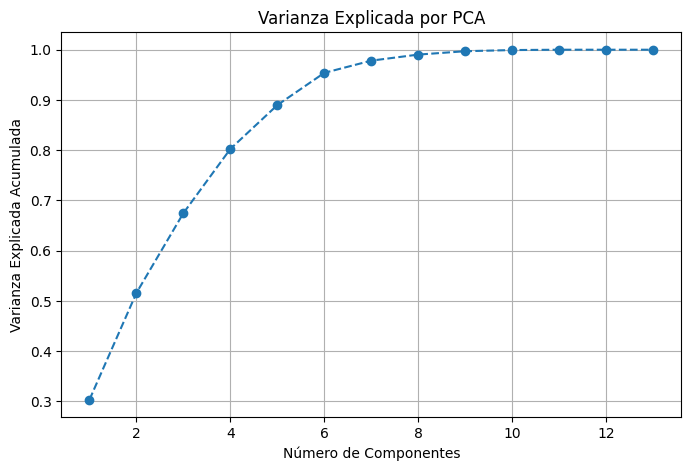

In [ ]:
# Aplicar PCA con todas las variables
pca = PCA(n_components=13)  # Mantendremos todos los componentes (13) para el análisis inicial
X_pca = pca.fit_transform(X_scaled)

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, 14), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.grid()
plt.show()


Por metodo del codo adopto como número de componentes = 6, debido a que se nota el punto de inflexión de la curva en ese valor.

Esto lleva a que PCA baje el número de variables a 6 que representen en su conjunto a la mayor parte de los datos.

In [ ]:
pca = PCA(n_components=6)
pca.fit(X_scaled)

# Mostrar las cargas de los primeros seis componentes
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6'], index=[
    "Cement [Kg/m³]",
    "Blast Furnace Slag [Kg/m³]",
    "Fly Ash [Kg/m³]",
    "Water [Kg/m³]",
    "Superplasticizer [Kg/m³]",
    "Coarse Aggregate [Kg/m³]",
    "Fine Aggregate [Kg/m³]",
    "Age [days]",
    'Water_Cement_Ratio',
    'Aggregate_Ratio',
    'Binder_Content',
    'Water_Binder_Ratio',
    'Total_Components'
])

print('Cargas de los 6 componentes')
loadings

Cargas de los 6 componentes


,PC1,PC2,PC3,PC4,PC5,PC6
Cement [Kg/m³],-0.340419,-0.263701,0.124734,-0.399264,0.102821,-0.160529
Blast Furnace Slag [Kg/m³],-0.008865,-0.128622,-0.504418,0.231440,-0.515319,0.187664
Fly Ash [Kg/m³],-0.004155,0.281743,0.008013,0.406113,0.635079,-0.050329
Water [Kg/m³],0.331049,-0.326434,-0.194723,-0.197565,0.162705,-0.196146
Superplasticizer [Kg/m³],-0.326410,0.286049,-0.143343,0.174876,0.174748,0.171764
Coarse Aggregate [Kg/m³],0.064385,-0.138012,0.570342,0.351114,-0.191044,0.103551
Fine Aggregate [Kg/m³],0.015439,0.527143,0.115380,-0.287248,-0.209499,0.094052
Age [days],0.096170,-0.198672,0.011167,-0.234116,0.259894,0.905555
Water_Cement_Ratio,0.379151,0.147589,-0.241037,0.318743,-0.098559,0.083261
Aggregate_Ratio,0.012153,-0.477012,0.228507,0.386402,0.037678,0.004544


En porcentajes:  

| Variable                   | PC1 (%) | PC2 (%) | PC3 (%) | PC4 (%) | PC5 (%) | PC6 (%) |
|----------------------------|---------|---------|---------|---------|---------|---------|
| Cement [Kg/m³]            | -34.04  | -26.37  | 12.47   | -39.93  | 10.28   | -16.05  |
| Blast Furnace Slag [Kg/m³] | -0.89   | -12.86  | -50.44  | 23.14   | -51.53  | 18.77   |
| Fly Ash [Kg/m³]           | -0.42   | 28.17   | 0.80    | 40.61   | 63.51   | -5.03   |
| Water [Kg/m³]             | 33.10   | -32.64  | -19.47  | -19.76  | 16.27   | -19.61  |
| Superplasticizer [Kg/m³]  | -32.64  | 28.60   | -14.33  | 17.48   | 17.47   | 17.18   |
| Coarse Aggregate [Kg/m³]  | 6.44    | -13.80  | 57.03   | 35.11   | -19.10  | 10.36   |
| Fine Aggregate [Kg/m³]    | 1.54    | 52.71   | 11.54   | -28.72  | -20.95  | 9.41    |
| Age [days]                | 9.62    | -19.87  | 1.12    | -23.41  | 25.99   | 90.56   |
| Water_Cement_Ratio        | 37.92   | 14.76   | -24.10  | 31.87   | -9.86   | 8.33    |
| Aggregate_Ratio           | 1.22    | -47.70  | 22.85   | 38.64   | 3.77    | 0.45    |
| Binder_Content           | -39.46  | -22.23  | -32.30  | 4.56    | 7.47    | -4.10   |
| Water_Binder_Ratio       | 45.34   | 5.96    | 19.24   | -17.96  | -5.78   | -5.35   |
| Total_Components        | -38.62  | 8.64    | 28.47   | 8.15    | -30.91  | 13.19   |


En los datos anteriores se puede ver como cada variable "pesa" en la conformación de las nuevas variables PC.

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.30333251, 0.21252184, 0.1589117 , 0.12774343, 0.08727725,
       0.06415771])

Este array nos indica el % que representa la nueva variable respecto al total de los datos. Es decir:
- PC1: Representa el 28% del total de la varianza de los datos.
- PC2: Representa el 19% del total de la varianza de los datos.
- PC3: Representa el 18% del total de de la varianza los datos.
- PC4: Representa el 15% del total de de la varianza los datos.
- PC5: Representa el 9% del total de de la varianza los datos.
- PC6: Representa el 7% del total de de la varianza los datos.

Por lo que utilizando PCA reducimos a 6 variables/features del total y estas representan el 95% de la varianza.

------------------------

### División en datos de entrenamiento y de testeo del total de datos.
En esta parte se divide el total de datos en:
- Datos de entrenamiento: Datos que se utilizarán para que el modelo aprenda de ellos.
- Datos de testeo: Datos que se utilizarán para comprobar que tan bueno es el modelo prediciendo.

La división se realizará para los datos con y sin reducción de dimensionalidad (PCA) con el objetivo de determinar que metodo ajusta mejor los datos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Se dividen en 70% datos para entrenar y 30% de datos para testear
#X original pasa a dividirse en X_train y X_test
#y pasa a dividirse en y_train e y_test

Se vuelve a escalar los datos:
En un caso, train, se ajusta y se transforma y en el otro, test, solo lo transforma según lo que ya ajusto en el anterior.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Aplicamos PCA nuevamente para dividir los datos:

In [ ]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

---

## Entrenamiento y Optimización de Modelos de Regresión
En esta sección se entrenarán modelos de machine learning de regresión con el objetivo de predecir la resistencia del concreto en función de sus componentes (como cemento, agua y aditivos).
Se compararán cuatro algoritmos principales:

* Regresión Lineal
* Random Forest
* XGBoost
* SVM

Cada modelo se evaluará con y sin reducción de dimensionalidad (PCA) para determinar la mejor estrategia. El resultado final ayudará a elegir el método más preciso para predecir la resistencia del concreto.

1. **Regresión Lineal**

Un modelo básico que asume una relación lineal entre las características y la resistencia del concreto. Es rápido y fácil de interpretar.

In [ ]:
#Regresión Lineal sin PCA
model = LinearRegression() #Modelo
model.fit(X_train_scaled, y_train) #Entrenamiento
y_pred = model.predict(X_test_scaled) #Predicción de "y" (Concrete Compressive Strength [MPa]) a partir de los datos de entrenamiento X_test_scaled
mse = mean_squared_error(y_test, y_pred) #Metrica de Error cuadrático medio
r2 = r2_score(y_test, y_pred) #Metrica de r^2


In [ ]:
# Entrenar modelo CON PCA
model_pca = LinearRegression() #Modelo
model_pca.fit(X_train_pca, y_train) #Entrenamiento
y_pred_pca = model_pca.predict(X_test_pca) #Predicción de "y" (Concrete Compressive Strength [MPa]) a partir de los datos de entrenamiento X_test_pca
mse_pca = mean_squared_error(y_test, y_pred_pca) #Metrica de Error cuadrático medio
r2_pca = r2_score(y_test, y_pred_pca) #Metrica de r^2

In [ ]:
# Almacenamiento de resultados
results_lr = pd.DataFrame({
    'Modelo': ['LinearRegression', 'LinearRegression'],
    'PCA': ['No', 'Sí'],
    'MSE': [mse, mse_pca],
    'R²': [r2, r2_pca]
})

print("Resultados Regresión Lineal:")
print(results_lr)

Resultados Regresión Lineal:
             Modelo PCA         MSE        R²
0  LinearRegression  No  105.854561  0.608778
1  LinearRegression  Sí  107.765173  0.601717


2. **Random Forest**

Modelo de ensemble que combina múltiples árboles de decisión para mejorar la precisión. Maneja bien relaciones no lineales y evita el sobreajuste.

In [ ]:
# Entrenar modelo SIN PCA
model_rf = RandomForestRegressor(n_estimators=100, random_state=42) #Modelo con 100 árboles de decisión que se construirán en el ensemble.
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
# Entrenar modelo CON PCA
model_rf_pca = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = model_rf_pca.predict(X_test_pca)
mse_rf_pca = mean_squared_error(y_test, y_pred_rf_pca)
r2_rf_pca = r2_score(y_test, y_pred_rf_pca)

In [ ]:
# Almacenamiento de resultados
results_rf = pd.DataFrame({
    'Modelo': ['RandomForest', 'RandomForest'],
    'PCA': ['No', 'Sí'],
    'MSE': [mse_rf, mse_rf_pca],
    'R²': [r2_rf, r2_rf_pca]
})

print("\nResultados Random Forest:")
print(results_rf)


Resultados Random Forest:
         Modelo PCA        MSE        R²
0  RandomForest  No  23.595601  0.912794
1  RandomForest  Sí  55.565210  0.794640


3. **XGBoost**

Algoritmo de gradient boosting optimizado para velocidad y rendimiento. Ideal para problemas complejos y grandes conjuntos de datos.

In [ ]:
# Entrenar modelo SIN PCA
model_xgb = XGBRegressor(objective="reg:squarederror", n_estimators=100,random_state=42)
model_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = model_xgb.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [ ]:
# Entrenar modelo CON PCA
model_xgb_pca = XGBRegressor(objective="reg:squarederror", n_estimators=100,random_state=42) #"objetive='reg:squarederror'" -> Define la función de pérdida para problemas de regresión buscando disminuir el error entre los valores predecidos y reales.
model_xgb_pca.fit(X_train_pca, y_train)
y_pred_xgb_pca = model_xgb_pca.predict(X_test_pca)
mse_xgb_pca = mean_squared_error(y_test, y_pred_xgb_pca)
r2_xgb_pca = r2_score(y_test, y_pred_xgb_pca)

In [ ]:
# Almacenamiento de resultados
results_xgb = pd.DataFrame({
    'Modelo': ['XGBoost', 'XGBoost'],
    'PCA': ['No', 'Sí'],
    'MSE': [mse_xgb, mse_xgb_pca],
    'R²': [r2_xgb, r2_xgb_pca]
})

print("\nResultados XGBoost:")
print(results_xgb)


Resultados XGBoost:
    Modelo PCA        MSE        R²
0  XGBoost  No  20.465996  0.924361
1  XGBoost  Sí  43.042305  0.840922


4. **SVM (Máquinas de Soporte Vectorial)**

Busca separar los datos en un espacio de alta dimensión mediante un hiperplano óptimo. Efectivo con relaciones no lineales usando kernels.

In [ ]:
# Entrenar modelo SIN PCA
model_svm = SVR(kernel="rbf") # kernel="rbf" -> Usa una función 'Radial Basis Function' para transformar datos a un espacio de mayor dimensión para captura relaciones no lineales complejas.
model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

In [ ]:
# Entrenar modelo CON PCA
model_svm_pca = SVR(kernel="rbf")
model_svm_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = model_svm_pca.predict(X_test_pca)
mse_svm_pca = mean_squared_error(y_test, y_pred_svm_pca)
r2_svm_pca = r2_score(y_test, y_pred_svm_pca)

In [ ]:
# Almacenamiento de resultados
results_svm = pd.DataFrame({
    'Modelo': ['SVM', 'SVM'],
    'PCA': ['No', 'Sí'],
    'MSE': [mse_svm, mse_svm_pca],
    'R²': [r2_svm, r2_svm_pca]
})

print("\nResultados SVM:")
print(results_svm)


Resultados SVM:
  Modelo PCA         MSE        R²
0    SVM  No  105.482213  0.610154
1    SVM  Sí  104.906646  0.612282



**Concatenación en una tabla para lograr ver los resultados generales:**


In [ ]:
# Concatenar todos los resultados
resultados_finales = pd.concat([results_lr, results_rf, results_xgb, results_svm])

print("\nResultados Finales:")
resultados_finales.sort_values(by='MSE')


Resultados Finales:


,Modelo,PCA,MSE,R²
0,XGBoost,No,20.465996,0.924361
0,RandomForest,No,23.595601,0.912794
1,XGBoost,Sí,43.042305,0.840922
1,RandomForest,Sí,55.565210,0.794640
1,SVM,Sí,104.906646,0.612282
0,SVM,No,105.482213,0.610154
0,LinearRegression,No,105.854561,0.608778
1,LinearRegression,Sí,107.765173,0.601717


| Modelo           | PCA | MSE         | R²       |
|-----------------|-----|------------|----------|
| XGBoost        | No  | 20.465996  | 0.924361 |
| RandomForest   | No  | 23.595601  | 0.912794 |
| XGBoost        | Sí  | 43.042305  | 0.840922 |
| RandomForest   | Sí  | 55.565210  | 0.794640 |
| SVM            | Sí  | 104.906646 | 0.612282 |
| SVM            | No  | 105.482213 | 0.610154 |
| LinearRegression | No  | 105.854561 | 0.608778 |
| LinearRegression | Sí  | 107.765173 | 0.601717 |


**<u>Explicación de Métricas:</u>**
* **R²** (Coeficiente de Determinación): Valores cercanos a 1 indican mejor ajuste.

* **MSE** (Error Cuadrático Medio): Un menor valor indica menor error.

---



**<u>Conclusión de resultados de entrenamiento de modelos con y sin PCA:</u>**

- **Modelos con mejor desempeño:**
  - <u>**XGBoost (sin PCA)**</u>: MSE = 20.47 / R² = 0.924 → ***Mejor rendimiento.***
  - <u>**Random Forest (sin PCA)**</u>: MSE = 23.60 / R² = 0.913 → ***Segundo mejor.***

- **Modelos con peor desempeño:**
  - <u>**SVM**</u> y <u>**Regresión Lineal**</u> en ambos casos: MSE > 100 / R² < 0.62 → ***Resultados poco competitivos. No son las mejores opciones para este problema.***

**La aplicación de PCA empeora el rendimiento en todos los modelos, especialmente en XGBoost y RandomForest, lo que sugiere que en este caso <u>la reducción de dimensionalidad no es beneficiosa.</u>**




---

###Optimización de hiperparámetros:
En esta etapa se realizará una busqueda de hiperparametros que mejoren los resultados obtenidos con los modelos que mejor tuvieron desempeño:
- XGBoost
- Random Forest

Para este trabajo se utilizará el metodo: `Halving Randomized Search`. Este método permite a partir de una grilla de hiperparámetros de gran cantidad de combinaciones buscar los hiperparametros que mejor den resultado en el modelo, en menor tiempo y con menor probabilidad de cometer overfitting.

* Para RandomForest:

In [ ]:
#Grilla de hiperparametros a evaluar para RandomForest
params_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
modelo_rf = RandomForestRegressor(random_state=42)

In [ ]:
halving_rf = HalvingRandomSearchCV(estimator=modelo_rf,
                                       param_distributions=params_grid_rf,
                                       cv=5,
                                       scoring='r2',
                                       factor=2,
                                       random_state=42,
                                       n_jobs=-1)

halving_rf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan       

HalvingRandomSearchCV(estimator=RandomForestRegressor(random_state=42),
                      factor=2, n_jobs=-1,
                      param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                           'min_samples_split': [2, 5, 10],
                                           'n_estimators': [50, 100, 200, 300,
                                                            500]},
                      random_state=42, scoring='r2')

In [ ]:
#Mejores hiperparámetros encontrados:
print("RandomForest - Mejores Hiperparámetros:", halving_rf.best_params_)
print("RandomForest - Mejor Score (CV):", halving_rf.best_score_)

RandomForest - Mejores Hiperparámetros: {'n_estimators': 500, 'min_samples_split': 2, 'max_depth': None}
RandomForest - Mejor Score (CV): 0.899012826537259


In [ ]:
#Metricas de los resutlados de predicción:
y_pred_rf = halving_rf.predict(X_test_scaled)
print("RandomForest - Test R²:", r2_score(y_test, y_pred_rf))
print("RandomForest - Test MSE:", mean_squared_error(y_test, y_pred_rf))

RandomForest - Test R²: 0.9142660599716603
RandomForest - Test MSE: 23.197397921621572


* Para XGBoost:

In [ ]:
# Grilla de hiperparámetros a evaluar para XGBoost
params_grid_xgb = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10]
}

In [ ]:
modelo_xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

In [ ]:
halving_xgb = HalvingRandomSearchCV(estimator=modelo_xgb,
                                        param_distributions=params_grid_xgb,
                                        cv=5,
                                        scoring='r2',
                                        factor=2,
                                        random_state=42,
                                        n_jobs=-1)
halving_xgb.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan       

HalvingRandomSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=No...
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=42, ...),
                      factor=2, n_jobs=-1,
                      param_distributions={'learning_rate': [0.01, 0.05, 0.1,
                                                             0.2],
                                           'max_depth': [3, 5, 7, 10],
                                           'n_estimators': [50, 100, 200, 300,
                                                            500]},
                      random_state=42, scoring='r2')

In [ ]:
#Mejores hiperparámetros encontrados:
print("\nXGBoost - Mejores Hiperparámetros:", halving_xgb.best_params_)
print("XGBoost - Mejor Score (CV):", halving_xgb.best_score_)



XGBoost - Mejores Hiperparámetros: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2}
XGBoost - Mejor Score (CV): 0.9145041184430337


In [ ]:
#Metricas de los resultados de predicción:
y_pred_xgb = halving_xgb.predict(X_test_scaled)
print("XGBoost - Test R²:", r2_score(y_test, y_pred_xgb))
print("XGBoost - Test MSE:", mean_squared_error(y_test, y_pred_xgb))

XGBoost - Test R²: 0.9347110384768227
XGBoost - Test MSE: 17.665512862723325


##**<u>Conclusión de optimización de hiperparametros:</u>**
**XGBoost:**

Tras la optimización, XGBoost mostró una mejora: el MSE se redujo de 20.47 a 17.67 y el Test R² aumentó, alcanzando 0.9347. Esto indica que ajustar hiperparámetros (aumentar n_estimators, disminuir max_depth y aumentar learning_rate) permitió al modelo capturar mejor la complejidad de los datos.

**RandomForest**:

Los cambios en RandomForest fueron más sutiles; el Test R² se incrementó ligeramente de 0.9128 a 0.9143 y el MSE se redujo marginalmente. Esto sugiere que el modelo ya estaba cercano a su óptimo y la optimización tuvo un impacto menor en su rendimiento.

# Comparación de Modelos Antes y Después de la Optimización

| Modelo            | Hiperparámetros Optimizados | Mejor Score (CV) | Test R²  | Test MSE  |
|------------------|---------------------------|-----------------|----------|-----------|
| **XGBoost (Antes)**  | `n_estimators=100` | -               | 0.924361 | 20.465996 |
| **XGBoost (Después)** | `n_estimators=200, max_depth=3, learning_rate=0.2` | 0.914504 | 0.934711 | 17.665513 |
| **RandomForest (Antes)**  | `n_estimators=100` | -               | 0.912794 | 23.595601 |
| **RandomForest (Después)** | `n_estimators=500, min_samples_split=2, max_depth=None` | 0.899013 | 0.914266 | 23.197398 |


---
# <u>**Conclusión Final del Proyecto de Predicción de la Resistencia del Concreto**</u>

En este proyecto se abordó la problemática de predecir la resistencia a la compresión del concreto a partir de sus componentes.

## Etapas del Proyecto

- **Análisis Exploratorio de Datos (EDA):**  
  Se realizó una revisión de la distribución de cada variable, identificando patrones y posibles outliers mediante histogramas, boxplots y gráficos de dispersión. Este paso permitió confirmar las relaciones esperadas, como el impacto positivo del contenido de aglomerantes y la influencia de la edad en el fortalecimiento del concreto.
  También permitió comprobar las hipotesis planteadas al inicio.

- **Ingeniería de Atributos y Selección de Variables:**  
  Se generaron variables sintéticas relevantes, para capturar mejor las interacciones entre los ingredientes. Además, se aplicó PCA para reducir la dimensionalidad y ver con cual de los conjuntos de datos lograban mejores resultados.
  Se escalarón datos mediante `StandartScaler`.

- **Modelado y Optimización:**  
  Se dividió el conjunto de datos en datos de entrenamiento y datos para testeo para diversos modelos de regresión, **Regresión Lineal**, **Random Forest**, **XGBoost** y **SVM**.
  **`Random Forest`** y **`XGBoost`** mostraron un desempeño superior en la predicción de la resistencia del concreto mediante el análisis de métricas como **R²** y **MSE**. Posteriormente, se aplicó una optimización de hiperparámetros utilizando técnicas como `Halving Random Search` con validación cruzada, lo que permitió afinar los modelos y mejorar sus métricas predictivas (R² y MSE).

## Resultados

- **Modelos Finales:**  
  Los resultados finales demostraron que **XGBoost** y **Random Forest** son los modelos más prometedores para este problema, ofreciendo un mayor R² y menor MSE en la predicción.  
- **Optimización de Hiperparámetros:**  
  La aplicación de métodos de búsqueda eficiente de hiperparámetros contribuyó a reducir el error y aumentar la robustez de los modelos.
